In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
clicks = pd.read_parquet('baseline_data.pqt')

In [3]:
clicks

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second
0,27226,3,1,13,120,2017-11-06 15:13:23,None,0,6,15,13,23
1,110007,35,1,13,10,2017-11-06 15:41:07,2017-11-07 08:17:19,1,6,15,41,7
2,1047,6,1,13,157,2017-11-06 15:42:32,None,0,6,15,42,32
3,76270,3,1,13,120,2017-11-06 15:56:17,None,0,6,15,56,17
4,57862,3,1,13,120,2017-11-06 15:57:01,None,0,6,15,57,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2300556,9791,2,1,19,166,2017-11-09 15:59:59,None,0,9,15,59,59
2300557,6240,14,1,13,146,2017-11-09 15:59:59,None,0,9,15,59,59
2300558,15098,12,2,17,50,2017-11-09 16:00:00,None,0,9,16,0,0
2300559,10538,12,1,15,41,2017-11-09 16:00:00,None,0,9,16,0,0


In [4]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2300561 entries, 0 to 2300560
Data columns (total 12 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ip               int64         
 1   app              int64         
 2   device           int64         
 3   os               int64         
 4   channel          int64         
 5   click_time       datetime64[ns]
 6   attributed_time  object        
 7   is_attributed    int64         
 8   day              uint8         
 9   hour             uint8         
 10  minute           uint8         
 11  second           uint8         
dtypes: datetime64[ns](1), int64(6), object(1), uint8(4)
memory usage: 166.7+ MB


In [5]:
clicks.describe()

,ip,app,device,os,channel,is_attributed,day,hour,minute,second
count,2.300561e+06,2.300561e+06,2.300561e+06,2.300561e+06,2.300561e+06,2.300561e+06,2.300561e+06,2.300561e+06,2.300561e+06,2.300561e+06
mean,4.772099e+04,1.533729e+01,1.373733e+01,1.992378e+01,7.837766e+01,1.985803e-01,7.867650e+00,9.160539e+00,2.934901e+01,2.955570e+01
std,5.721562e+04,1.933889e+01,1.283431e+02,1.933226e+01,4.814592e+01,3.989313e-01,8.867873e-01,6.120964e+00,1.738031e+01,1.725196e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.329300e+04,3.000000e+00,1.000000e+00,1.300000e+01,3.800000e+01,0.000000e+00,7.000000e+00,4.000000e+00,1.400000e+01,1.500000e+01
50%,2.661100e+04,1.200000e+01,1.000000e+00,1.800000e+01,7.500000e+01,0.000000e+00,8.000000e+00,9.000000e+00,2.900000e+01,3.000000e+01
75%,4.986300e+04,1.800000e+01,1.000000e+00,2.000000e+01,1.090000e+02,0.000000e+00,9.000000e+00,1.300000e+01,4.400000e+01,4.400000e+01
max,2.602370e+05,3.880000e+02,1.917000e+03,2.310000e+02,1.800000e+02,1.000000e+00,9.000000e+00,2.300000e+01,5.900000e+01,5.900000e+01


In [13]:
clicks.isna().sum()

ip                       0
app                      0
device                   0
os                       0
channel                  0
click_time               0
attributed_time    1843715
is_attributed            0
day                      0
hour                     0
minute                   0
second                   0
dtype: int64

In [6]:
clicks.drop(['click_time', 'attributed_time'], axis=1, inplace=True)

In [7]:
clicks

,ip,app,device,os,channel,is_attributed,day,hour,minute,second
0,27226,3,1,13,120,0,6,15,13,23
1,110007,35,1,13,10,1,6,15,41,7
2,1047,6,1,13,157,0,6,15,42,32
3,76270,3,1,13,120,0,6,15,56,17
4,57862,3,1,13,120,0,6,15,57,1
...,...,...,...,...,...,...,...,...,...,...
2300556,9791,2,1,19,166,0,9,15,59,59
2300557,6240,14,1,13,146,0,9,15,59,59
2300558,15098,12,2,17,50,0,9,16,0,0
2300559,10538,12,1,15,41,0,9,16,0,0


### Split Data

In [8]:
clicks_full_train, clicks_test = train_test_split(clicks, test_size=0.2, random_state=1)
clicks_train, clicks_val = train_test_split(clicks_full_train, test_size=0.25, random_state=1)

In [9]:
len(clicks_train), len(clicks_val), len(clicks_test)

(1380336, 460112, 460113)

In [10]:
clicks_train

,ip,app,device,os,channel,is_attributed,day,hour,minute,second
2153590,8017,18,1,18,26,0,9,12,23,21
641944,38226,164,1,22,14,1,7,13,8,55
491085,1498,3,1,19,89,0,7,9,22,12
1059833,36167,29,1,30,59,0,8,4,44,32
1418900,7226,12,1,19,105,0,8,13,32,10
...,...,...,...,...,...,...,...,...,...,...
2129213,4568,18,1,18,16,0,9,11,48,33
354780,32411,2,1,20,62,0,7,5,41,41
1649736,13584,3,1,19,89,0,9,0,17,49
977127,26334,3,1,39,120,0,8,2,51,22


In [11]:
clicks_train = clicks_train.reset_index(drop=True)
clicks_val = clicks_val.reset_index(drop=True)
clicks_test = clicks_test.reset_index(drop=True)

In [12]:
y_train = clicks_train['is_attributed'].values
y_val = clicks_val['is_attributed'].values
y_test = clicks_test['is_attributed'].values

In [13]:
y_train

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
del clicks_train['is_attributed']
del clicks_val['is_attributed']
del clicks_test['is_attributed']

In [15]:
clicks_train

,ip,app,device,os,channel,day,hour,minute,second
0,8017,18,1,18,26,9,12,23,21
1,38226,164,1,22,14,7,13,8,55
2,1498,3,1,19,89,7,9,22,12
3,36167,29,1,30,59,8,4,44,32
4,7226,12,1,19,105,8,13,32,10
...,...,...,...,...,...,...,...,...,...
1380331,4568,18,1,18,16,9,11,48,33
1380332,32411,2,1,20,62,7,5,41,41
1380333,13584,3,1,19,89,9,0,17,49
1380334,26334,3,1,39,120,8,2,51,22


In [142]:
dicts_train = clicks_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts)

dicts_val = clicks_val.to_dict(orient='records')
X_val = dv.transform(dicts_val)

### Modeling

#### Logistics Regression

In [144]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)

LogisticRegression()

In [145]:
y_pred = log_clf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8004762566523435

In [51]:
y_pred = log_clf.predict(clicks_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91    368874
           1       0.69      0.38      0.49     91238

    accuracy                           0.84    460112
   macro avg       0.78      0.67      0.70    460112
weighted avg       0.83      0.84      0.83    460112



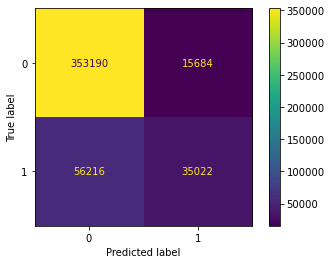

In [54]:
plot_confusion_matrix(log_clf, clicks_val, y_val)  
plt.show()

##### Parameter Tuning

In [16]:
for C in tqdm([0.001, 0.01, 0.1, 1, 10]):
    log_clf = LogisticRegression(C=C, random_state=1)
    log_clf.fit(clicks_train, y_train)
    y_pred = log_clf.predict_proba(clicks_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print("%s -> %.3f" % (C, auc))

  0%|          | 0/5 [00:00<?, ?it/s]

0.001 -> 0.818
0.01 -> 0.809
0.1 -> 0.800
1 -> 0.800
10 -> 0.800


In [17]:
for C in tqdm([0.001, 0.01, 1]):
    for pen in tqdm(['l1','l2']):
        log_clf = LogisticRegression(C=C, penalty=pen, solver='liblinear', random_state=1)
        log_clf.fit(clicks_train, y_train)
        y_pred = log_clf.predict_proba(clicks_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print("%s, %s -> %.3f" % (C, pen, auc))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0.001, l1 -> 0.838
0.001, l2 -> 0.837


  0%|          | 0/2 [00:00<?, ?it/s]

0.01, l1 -> 0.839
0.01, l2 -> 0.836


  0%|          | 0/2 [00:00<?, ?it/s]

1, l1 -> 0.839
1, l2 -> 0.838


In [18]:
log_clf = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
log_clf.fit(clicks_train, y_train)
y_pred = log_clf.predict_proba(clicks_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8390477002490312

In [19]:
y_pred = log_clf.predict(clicks_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91    368874
           1       0.73      0.38      0.50     91238

    accuracy                           0.85    460112
   macro avg       0.80      0.67      0.71    460112
weighted avg       0.84      0.85      0.83    460112



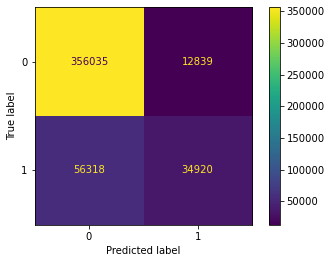

In [20]:
plot_confusion_matrix(log_clf, clicks_val, y_val)  
plt.show()

#### Decision Tree

In [68]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(clicks_train, y_train)
y_pred = dt_clf.predict_proba(clicks_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8870362420009114

In [69]:
y_pred = dt_clf.predict(clicks_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95    368874
           1       0.80      0.82      0.81     91238

    accuracy                           0.93    460112
   macro avg       0.88      0.89      0.88    460112
weighted avg       0.93      0.93      0.93    460112



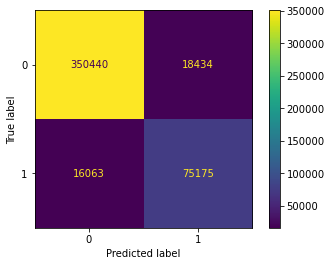

In [71]:
plot_confusion_matrix(dt_clf, clicks_val, y_val)  
plt.show()

In [21]:
scores = []

for d in tqdm([5, 15, 25]):
    for s in tqdm([1, 3, 5, 10, 50]):
        dt_clf = DecisionTreeClassifier(max_depth=d,
                                    min_samples_leaf=s,
                                    random_state=1)
        dt_clf.fit(clicks_train, y_train)

        y_pred = dt_clf.predict_proba(clicks_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [22]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [23]:
df_scores.sort_values('auc', ascending=False)

,max_depth,min_samples_leaf,auc
9,15,50,0.965566
8,15,10,0.963957
7,15,5,0.962874
6,15,3,0.961684
14,25,50,0.958796
5,15,1,0.957879
0,5,1,0.948795
1,5,3,0.948795
2,5,5,0.948795
3,5,10,0.948795


In [82]:
for s in tqdm([50, 75, 100, 125]):
    dt_clf = DecisionTreeClassifier(max_depth=15,
                                min_samples_leaf=s,
                                random_state=1)
    dt_clf.fit(clicks_train, y_train)

    y_pred = dt_clf.predict_proba(clicks_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print('%s -> %.3f' % (s, auc))

  0%|          | 0/4 [00:00<?, ?it/s]

50 -> 0.966
75 -> 0.966
100 -> 0.966
125 -> 0.966


#### Random Forest

In [25]:
scores = []

for d in tqdm([5, 10, 15]):
    rf_clf = RandomForestClassifier(n_estimators=10,
                                    max_depth=d,
                                    warm_start=True,
                                    random_state=1)
    for n in tqdm(range(10, 101, 5)):
        rf_clf.n_estimator = n
        rf_clf.fit(clicks_train, y_train)

        y_pred = rf_clf.predict_proba(clicks_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

In [26]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

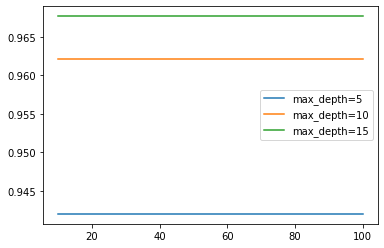

In [27]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

#### Gradient Boosting Tree

In [31]:
dtrain = xgb.DMatrix(clicks_train, label=y_train)
dval = xgb.DMatrix(clicks_val, label=y_val)

In [47]:
dtrain.feature_names

['ip', 'app', 'device', 'os', 'channel', 'day', 'hour', 'minute', 'second']

In [33]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [34]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 15,
    'min_child_weight': 50,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-auc:0.96603	val-auc:0.96525
[5]	train-auc:0.96962	val-auc:0.96832
[10]	train-auc:0.97130	val-auc:0.96895
[15]	train-auc:0.97255	val-auc:0.96984
[20]	train-auc:0.97360	val-auc:0.97042
[25]	train-auc:0.97409	val-auc:0.97072
[30]	train-auc:0.97441	val-auc:0.97087
[35]	train-auc:0.97484	val-auc:0.97107
[40]	train-auc:0.97517	val-auc:0.97121
[45]	train-auc:0.97546	val-auc:0.97133
[50]	train-auc:0.97562	val-auc:0.97135
[55]	train-auc:0.97591	val-auc:0.97146
[60]	train-auc:0.97597	val-auc:0.97149
[65]	train-auc:0.97610	val-auc:0.97149
[70]	train-auc:0.97642	val-auc:0.97151
[75]	train-auc:0.97656	val-auc:0.97149
[80]	train-auc:0.97686	val-auc:0.97154
[85]	train-auc:0.97695	val-auc:0.97153
[90]	train-auc:0.97702	val-auc:0.97151
[95]	train-auc:0.97724	val-auc:0.97148
[99]	train-auc:0.97725	val-auc:0.97149


In [148]:
eval_set = [(X_val, y_val)]

In [149]:
model = xgb.XGBClassifier(eta=0.3,
                        max_depth=15,
                        min_child_weight=50,
                        objective='binary:logistic',
                        eval_metric='auc',
                        n_jobs=8,
                        random_state=1)

model.fit(X_train, y_train, eval_set=eval_set, verbose=5)

[0]	validation_0-auc:0.96525
[5]	validation_0-auc:0.96832
[10]	validation_0-auc:0.96895
[15]	validation_0-auc:0.96984
[20]	validation_0-auc:0.97042
[25]	validation_0-auc:0.97072
[30]	validation_0-auc:0.97087
[35]	validation_0-auc:0.97107
[40]	validation_0-auc:0.97121
[45]	validation_0-auc:0.97133
[50]	validation_0-auc:0.97135
[55]	validation_0-auc:0.97146
[60]	validation_0-auc:0.97149
[65]	validation_0-auc:0.97149
[70]	validation_0-auc:0.97151
[75]	validation_0-auc:0.97149
[80]	validation_0-auc:0.97154
[85]	validation_0-auc:0.97153
[90]	validation_0-auc:0.97151
[95]	validation_0-auc:0.97148
[99]	validation_0-auc:0.97149


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.3,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=50,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=8, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, ...)

In [150]:
y_pred = model.predict_proba(X_val)[:,1]

In [151]:
roc_auc_score(y_val, y_pred)

0.9714876715751363

In [153]:
y_pred = model.predict(X_val)

In [155]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    368874
           1       0.95      0.84      0.89     91238

    accuracy                           0.96    460112
   macro avg       0.95      0.92      0.93    460112
weighted avg       0.96      0.96      0.96    460112



In [154]:
confusion_matrix(y_val, y_pred)

array([[364435,   4439],
       [ 14309,  76929]], dtype=int64)

### Save Model

In [39]:
import pickle

In [74]:
output_file = 'model_xgb.bin'

In [156]:
with open(output_file, 'wb') as f_out: 
    pickle.dump((dv,model), f_out)

### Load Model

In [157]:
input_file = 'model_xgb.bin'
with open(input_file, 'rb') as f_in: 
    dv, model_xgb = pickle.load(f_in)

In [158]:
model_xgb

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.3,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=50,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=8, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, ...)

In [159]:
dv

DictVectorizer(sparse=False)

In [170]:
click = {
    'ip': 23155,
    'app': 5,
    'device': 1,
    'os': 30,
    'channel': 20,
    'day': 7,
    'hour': 6,
    'minute': 20,
    'second': 15
}

In [171]:
y_pred = model.predict_proba(dv.transform([click]))[:,1]
y_pred

array([0.9966546], dtype=float32)

In [2]:
xgb.__version__

'1.6.2'